# Data Acquisition and analysis

My first step is to import the `yfinance` library which will be used to connect with the **YahooFinance API** to download data regarding the stock I wish to analyze. <br>
Then using the `datetime` library I define the starting and end periods of the stock data I wish to collect.

Then I run some functions like `head()` and `shape()` to get an idea about the structure of the data downloaded.

In [2]:
import yfinance as yf

from datetime import datetime
end= datetime.now()
start= datetime(end.year-20,end.month,end.day)
stock="NVDA"
nvidia_data = yf.download(stock,start,end)
nvidia_data['Average']=(nvidia_data['Open']+nvidia_data['Close'])/2


[*********************100%***********************]  1 of 1 completed


In [3]:
nvidia_data.head() #To view first 5 rows of the stock data, gives a general overview of the stock data I have downloaded.

Price,Close,High,Low,Open,Volume,Average
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2005-01-03,0.180207,0.188919,0.179443,0.186321,1066716000,0.183264
2005-01-04,0.171724,0.181812,0.168973,0.181507,790224000,0.176616
2005-01-05,0.173329,0.175393,0.168973,0.169890,724812000,0.171610
2005-01-06,0.171648,0.178449,0.170425,0.176386,563568000,0.174017
2005-01-07,0.168361,0.173329,0.165839,0.172030,763092000,0.170195


In [4]:
nvidia_data.shape #Getting an idea about the size of the data obtained. This data will later be splitted into testing and training sets for the model.

(5034, 6)

In [5]:
nvidia_data.describe() #The describe() function gives us various statistical information about the data such as the number of values, average, standard deviation, first and second quartiles etc.

Price,Close,High,Low,Open,Volume,Average
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5034.000000
mean,10.602749,10.795187,10.392937,10.603591,5.434473e+08,10.603170
std,25.089433,25.553349,24.591962,25.111699,3.220941e+08,25.098166
min,0.135270,0.146275,0.131831,0.137563,4.564400e+07,0.138480
25%,0.339570,0.344651,0.334278,0.340009,3.352372e+08,0.339436
50%,0.566326,0.575645,0.557032,0.566453,4.755695e+08,0.566644
75%,6.488910,6.543074,6.340842,6.444526,6.641030e+08,6.453625
max,148.869751,152.879470,146.249911,149.339720,3.692928e+09,148.189788


In [6]:
nvidia_data.info() #Information about the fields of the dataset such as datatype, number of non-null values etc.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2005-01-03 to 2025-01-02
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   5034 non-null   float64
 1   (High, NVDA)    5034 non-null   float64
 2   (Low, NVDA)     5034 non-null   float64
 3   (Open, NVDA)    5034 non-null   float64
 4   (Volume, NVDA)  5034 non-null   int64  
 5   (Average, )     5034 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [7]:
nvidia_data.isna().sum()  #Checking for presence of null values in the dataset. If there are null values, they must be cleaned before proceeding further.

Price    Ticker
Close    NVDA      0
High     NVDA      0
Low      NVDA      0
Open     NVDA      0
Volume   NVDA      0
Average            0
dtype: int64

**Importing pyplot** <br>
I use `%matplotlib inline` to ensure that the graph outputs are within the cell output block itself, instead of a separate page, for easier readability.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(15,10) #Setting universal figure size for plots

### Defining graph function

This is where I ran into my first hiccup. Initially I set `figsize` as a separate variable and put it into the function, but it wasn't rendering the graphs at the scale I wanted.
<br>
Infact, changing the value of `figsize` was doing nothing to change the graph size. 
<br>
I could have just ignored it and proceeded further but I wanted my plots to be easier to see and look more presentable, so I persevered and upon further investigation found out that since i was using `%matplotlib inline` , `figsize` would be ineffective. Hence I used `plt.rcParams` to set the universal plot size for the program.

In [9]:
def plotgraph(values,y_label,title,legend=False):
    values.plot()
    plt.xlabel('Time',size=12)
    plt.ylabel(y_label,size=12)
    plt.title(title)
    plt.legend().set_visible(legend)
    plt.show()

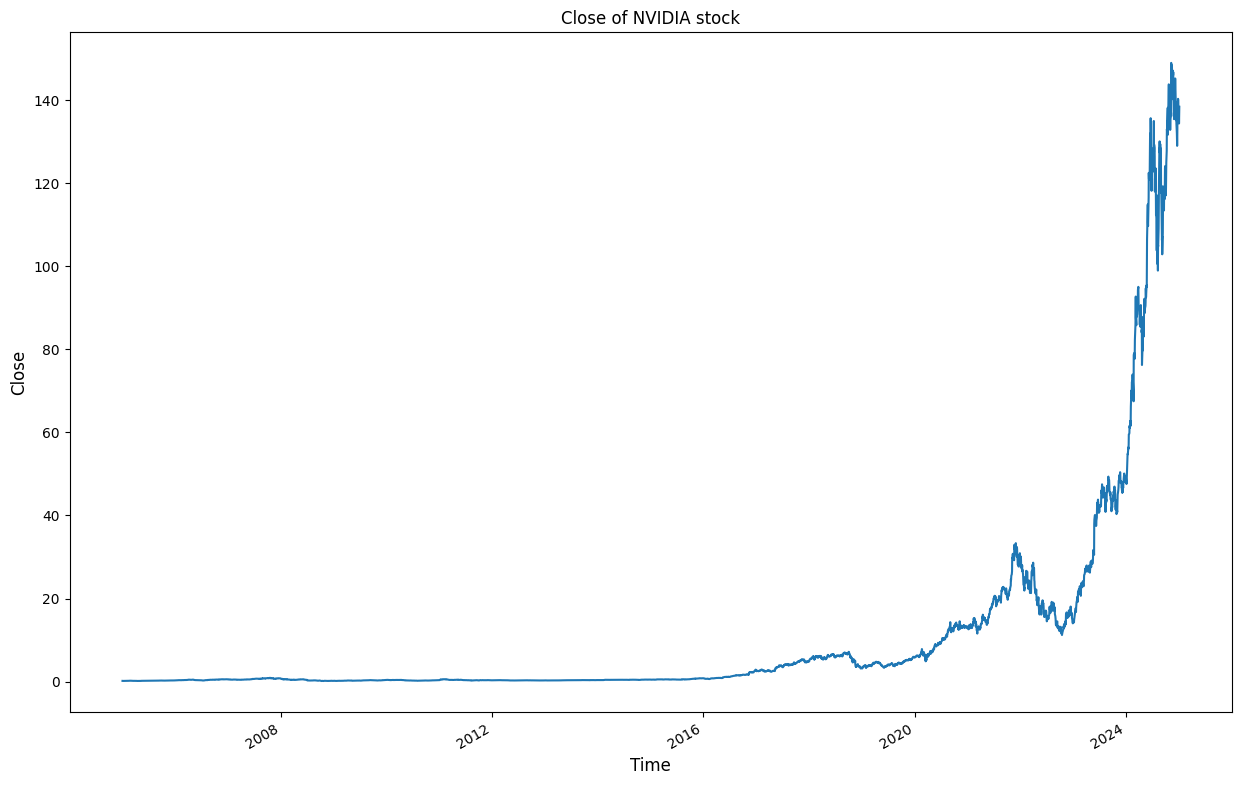

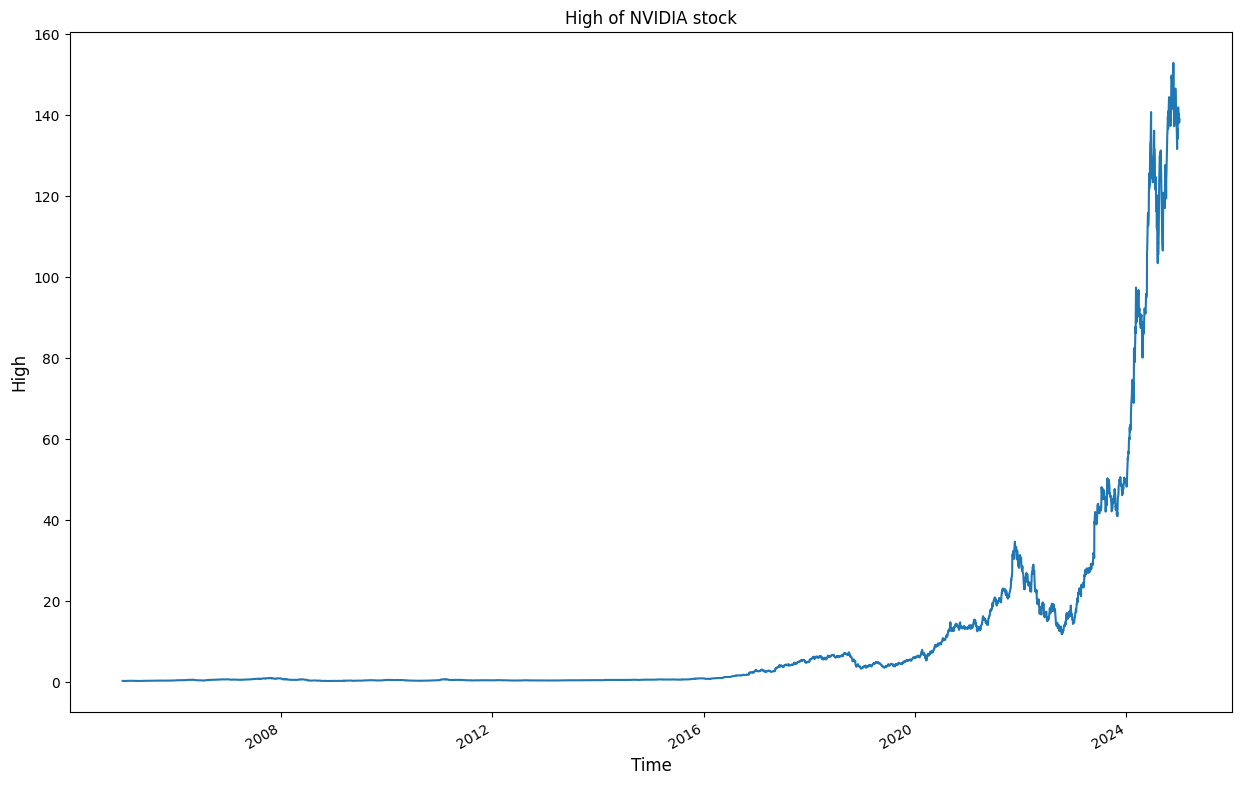

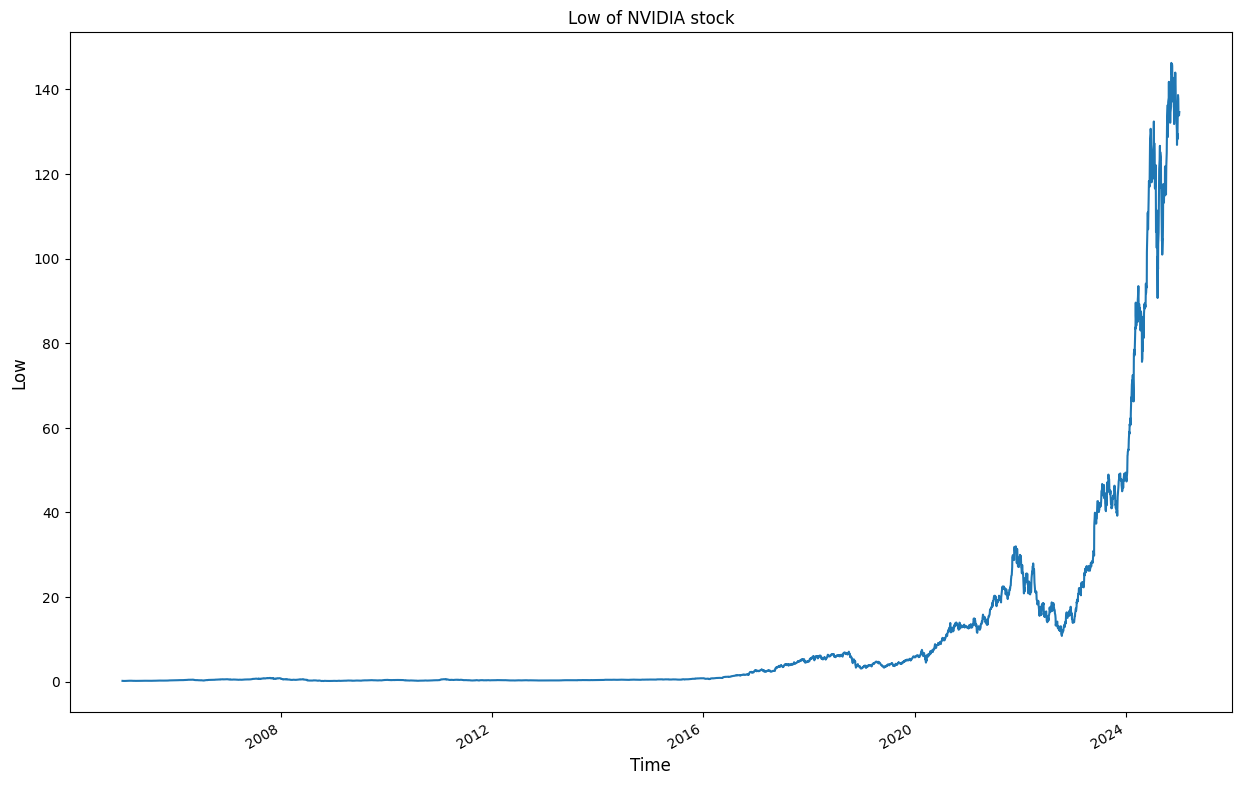

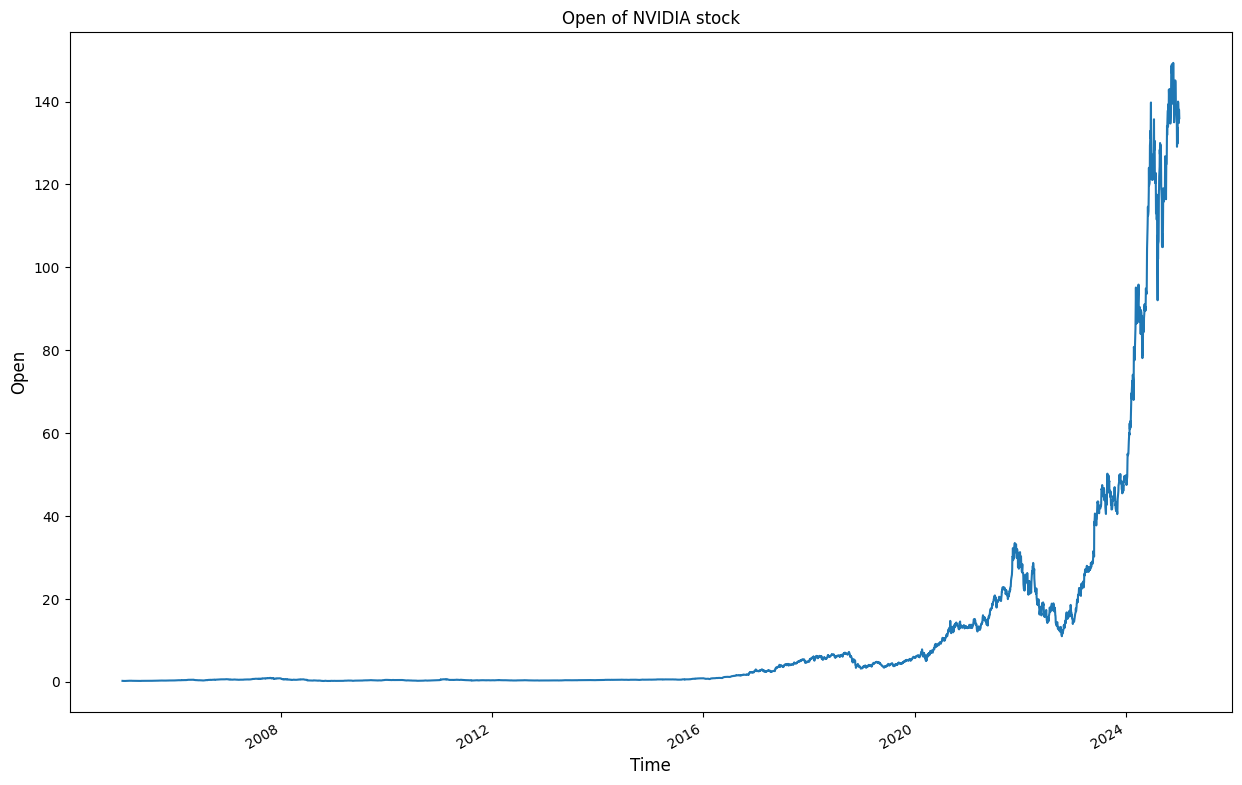

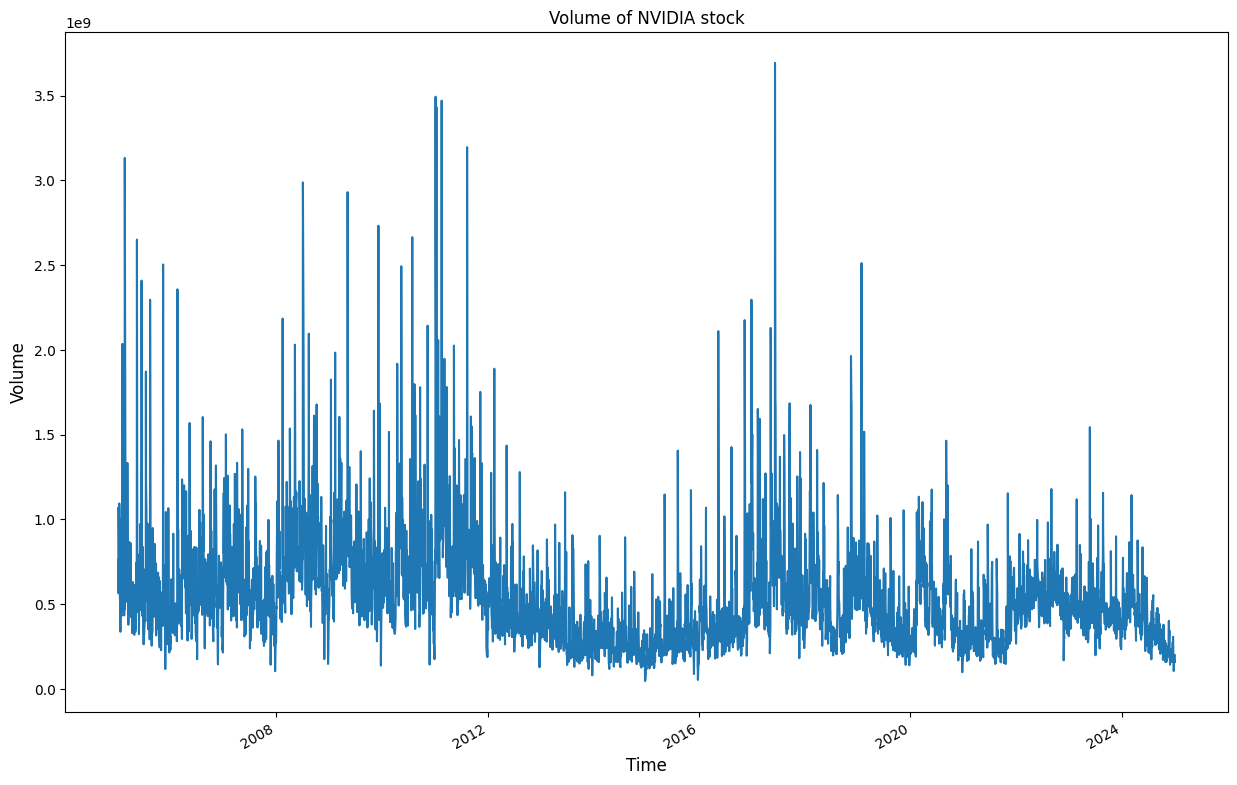

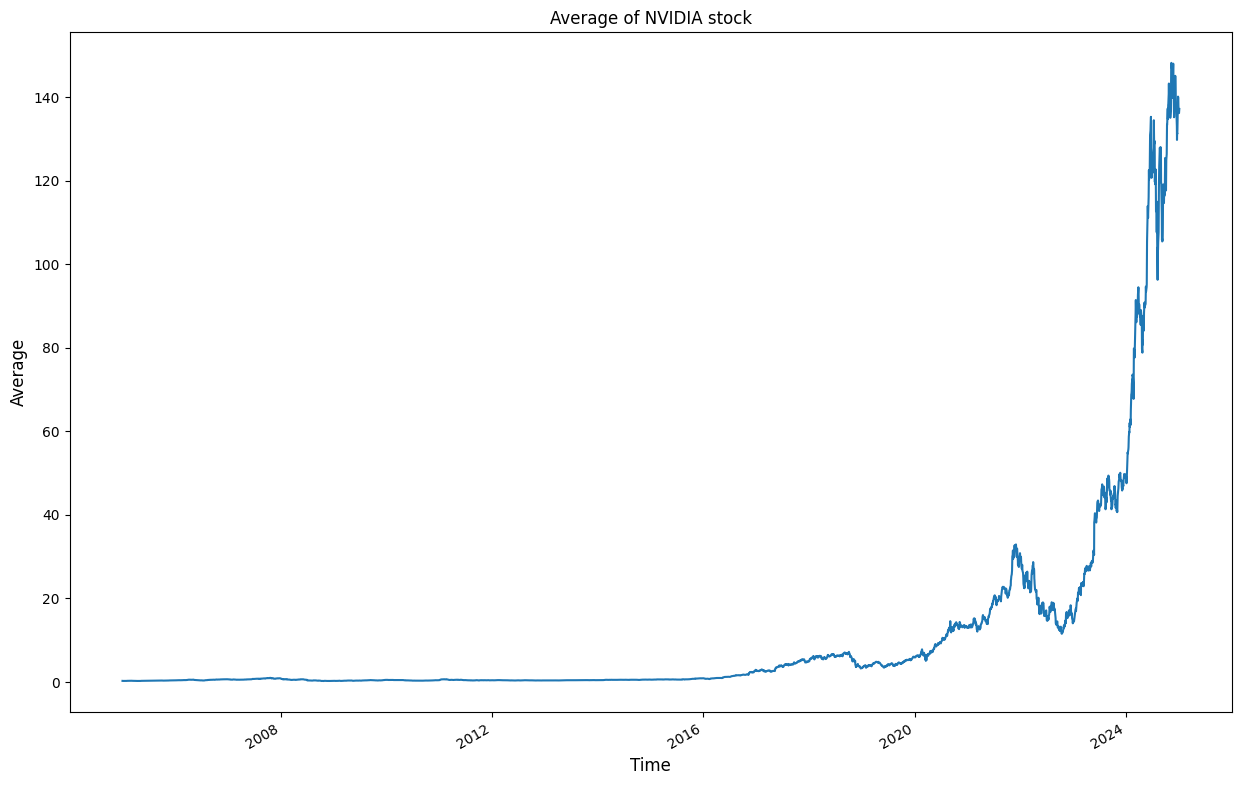

In [10]:
#Creating multiple plots of all fields using a for loop
for column in nvidia_data.columns:
    plotgraph(nvidia_data[column[0]],column[0],f"{column[0]} of NVIDIA stock")

# Counting number of days recorded per Year

I loop through the years between `start.year` and `end.year` and print each year along with the count of occurrences of that year in the dataframe.

---

## Explanation:
1. **`range(start.year, end.year)`**:
   - Generates a sequence of years from `start.year` to `end.year - 1` (inclusive of `start.year` but exclusive of `end.year`).

2. **`nvidia_data.index.year`**:
   - Assumes `nvidia_data.index` is a `DatetimeIndex` (common when working with time series data).
   - The `.year` attribute extracts the year component from each date in the index.

3. **`list(nvidia_data.index.year).count(i)`**:
   - Converts `nvidia_data.index.year` into a list of years.
   - Counts how many times the year `i` appears in the list using `.count(i)`.

4. **`print(i, list(nvidia_data.index.year).count(i))`**:
   - Prints the year (`i`) and the corresponding count.




In [11]:
#Obtaining the number of days 
for i in range(start.year,end.year): 
    print(i,list(nvidia_data.index.year).count(i))     

2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


Here I see that the number of days trading per year is less than 365. This is because trading does not occur on weekends and public holidays. On an average about 250 days are trading days per year, so that will be our time period for the moving average. 
<br>
<br>
The `rolling()` function provides a moving window to capture a number of consecutive values ending at the current row. 
<br>
Since our window size is 250, the function will return `NaN` for the first 249 values, as we need a minimum of 250 values (including the current row) for this function call to be effective.  
<br>
Here we use rolling(250).mean() to get the **Moving Average** for 250 days for each row.

In [26]:
nvidia_data['MA_250']=nvidia_data['Average'].rolling(250).mean()
nvidia_data['MA_250'].head()
print()
nvidia_data['MA_250'].tail()

Date
2024-12-26    107.267399
2024-12-27    107.619905
2024-12-30    107.969776
2024-12-31    108.324362
2025-01-02    108.681507
Name: MA_250, dtype: float64

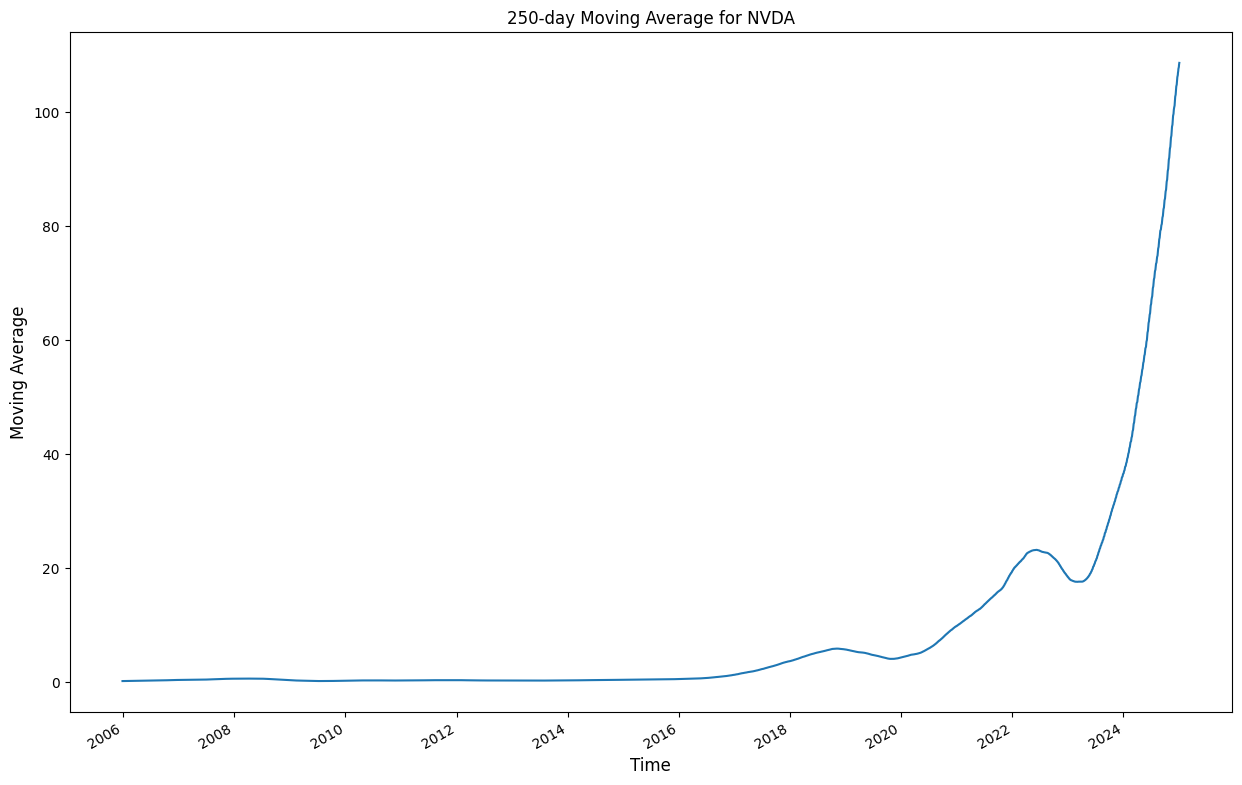

In [13]:
plotgraph(nvidia_data['MA_250'],'Moving Average','250-day Moving Average for NVDA')

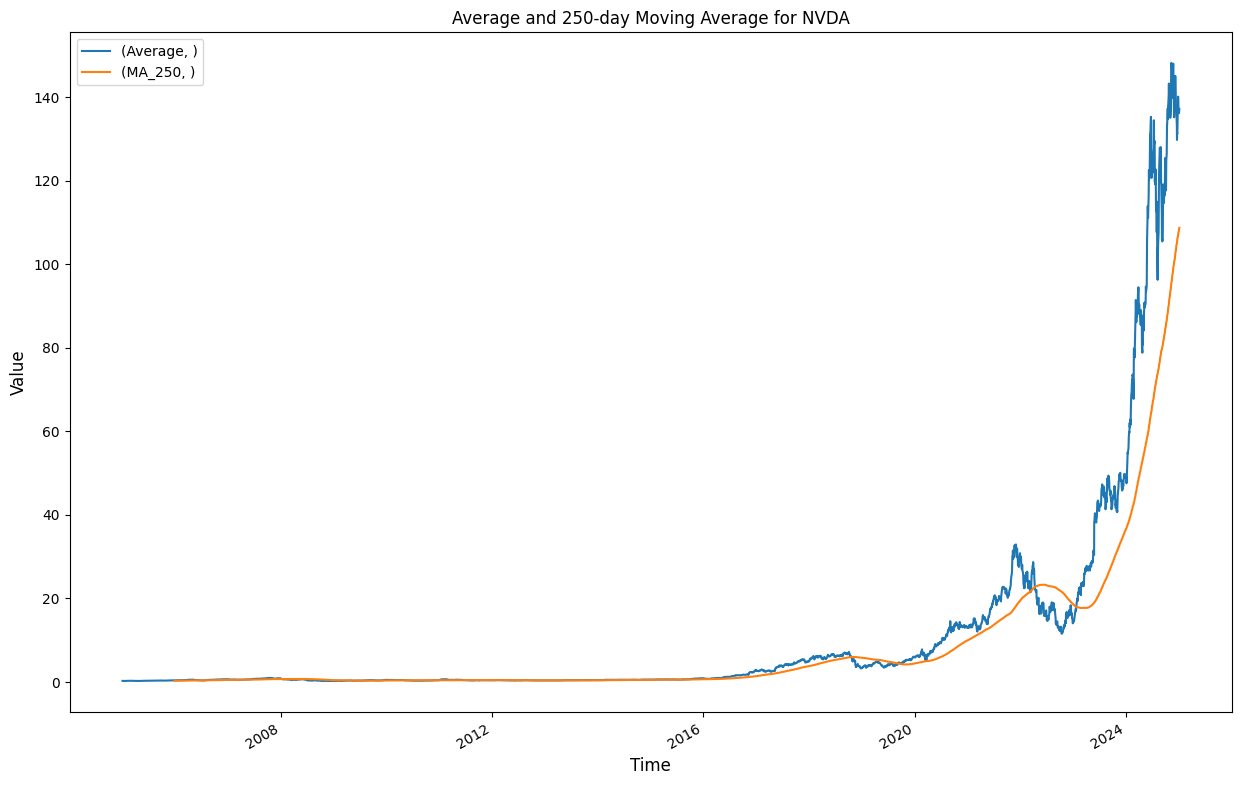

In [14]:
plotgraph(nvidia_data[['Average','MA_250']], 'Value','Average and 250-day Moving Average for NVDA',True)

## Testing for a shorter time period moving average and comparing with the 250-day one

It can be seen that the 100-day Moving Average is much closer to the Average price graph than the 250-day moving average.

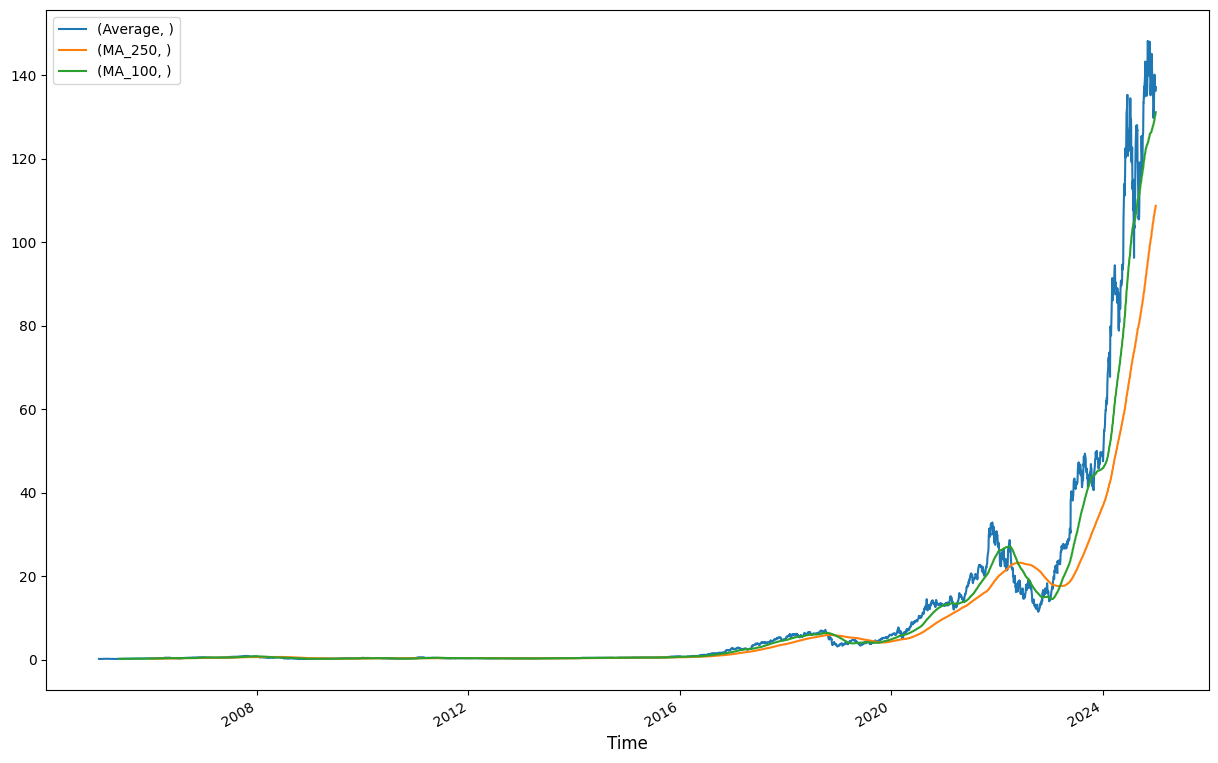

In [15]:
nvidia_data['MA_100']=nvidia_data['Average'].rolling(100).mean()
plotgraph(nvidia_data[['Average','MA_250','MA_100']], '','',True)

## Visual representation of the percentage change of NVDA stock over time

It should be noted that the `pct_change()` function only calculates the fractional change. To get the actual percentage change, the result must be multiplied by 100.

In [16]:
nvidia_data['Percentage_Change_Average'] = nvidia_data['Average'].pct_change()*100
nvidia_data[['Average','Percentage_Change_Average']].head()

Price,Average,Percentage_Change_Average
Ticker,,
Date,,
2005-01-03,0.183264,NaN
2005-01-04,0.176616,-3.627957
2005-01-05,0.171610,-2.834386
2005-01-06,0.174017,1.402831
2005-01-07,0.170195,-2.196033


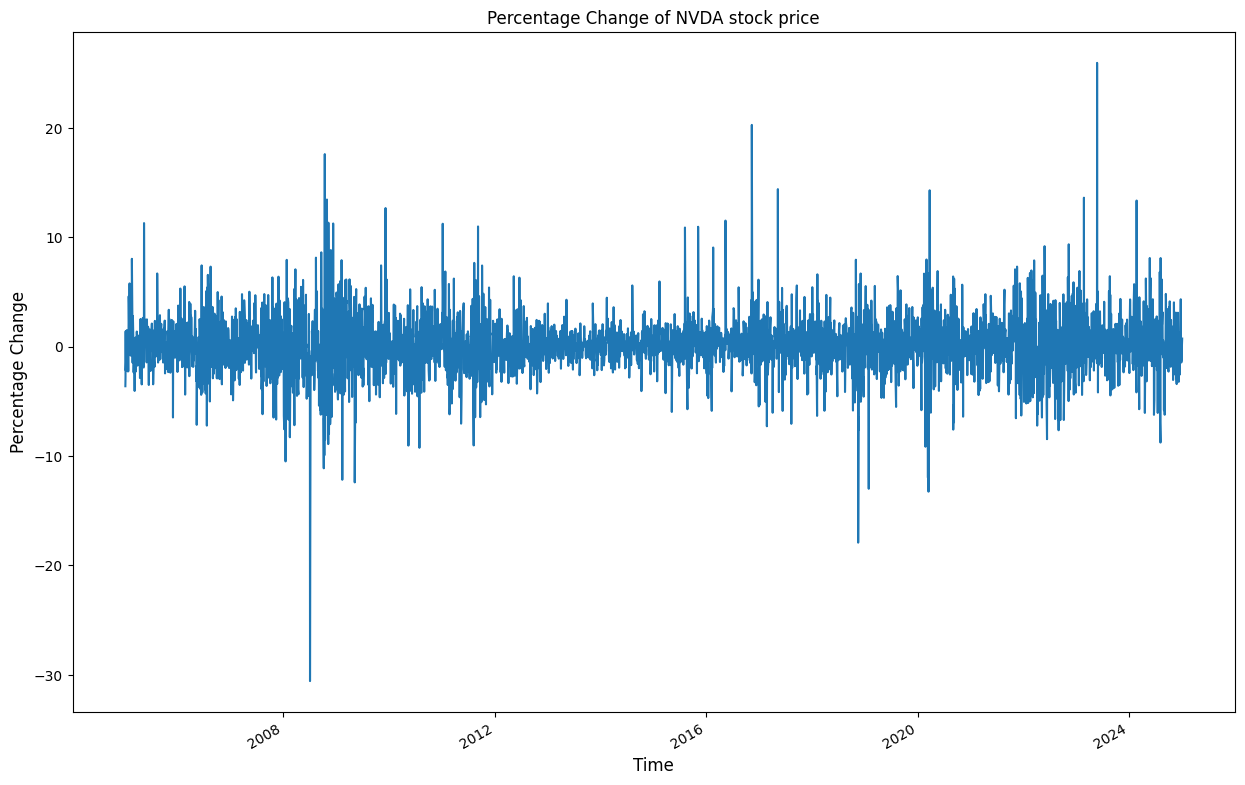

In [17]:
plotgraph(nvidia_data['Percentage_Change_Average'],'Percentage Change','Percentage Change of NVDA stock price')

# Preprocessing the Data

This step is done so that it is easier to train the model. <br>
I normalize the data by converting it into the sum range of -1 to 1.

In [20]:
Avg_price=nvidia_data[['Average']]
max(Avg_price.values),min(Avg_price.values)

(array([148.18978767]), array([0.1384799]))